# <font color="brown"> Customer Analysis - Spend Prediction and Segmentation </font>

<b> <font color="blue"> The exercise comprises of 2 major steps.
 1. Use the mall_customers.csv file to build a model for predicting the spend given gender, age and salary
 2. Build a model to cluster the customers into multiple groups and predict the customer segment for a new customer.</font>

<b> Importing all required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

<b> create a dataframe by reading the csv and check for bad records

In [2]:
cust_df = pd.read_csv("./mall_customers.csv",index_col=0)

In [3]:
cust_df.isna().sum()
cust_df.isnull().sum()
cust_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [4]:
if ( cust_df['Gender'].isna().sum() == 0 & cust_df['Age'].isna().sum() == 0 & 
    cust_df['Annual Income (k$)'].isna().sum() == 0 & cust_df['Spending Score (1-100)'].isna().sum() == 0):
    print ("No NA data present.")
    if (cust_df['Gender'].isnull().sum() == 0 & cust_df['Age'].isnull().sum() == 0 & 
    cust_df['Annual Income (k$)'].isnull().sum() == 0 & cust_df['Spending Score (1-100)'].isnull().sum() == 0):
        print("No null data present")
    else:
        print("need to clean for nulls")
else:
    print("need to clean for NA")
#cust_df['Gender'].isna().sum()

No NA data present.
No null data present


<b> Data is clean. No need to do any cleaning. Yaay!!

### <b> We need to do clustering. Let's try k-means first

In [5]:
cust_df["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score (1-100), Length: 84, dtype: int64

### Create a new DF to use all the 4 variables to create cluster - gender, age, salary, spend

In [6]:
cstdf=cust_df
cstdf=cstdf.replace('Male',0)
cstdf=cstdf.replace('Female',1)

In [7]:
cstdf['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

<b> performing k-means clustering using 6 clusters.

In [8]:
k_means = KMeans(n_clusters=6)
k_means.fit(cstdf)

KMeans(n_clusters=6)

#### Unique cluster values are listed below. Use this to add to the original dataframe later

In [9]:
labels=np.unique(k_means.labels_)
print("unique cluster labels : " , labels)

unique cluster labels :  [0 1 2 3 4 5]


In [10]:
cluster_labels=k_means.labels_
print("cluster labels for mall customer data : ", cluster_labels)

cluster labels for mall customer data :  [2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 5 4 5 3 2 4 5 3 3 3 5 3 3 5 5 5 5 5 3 5 5 3 5 5 5 3 5 5 3 3 5 5 5 5
 5 3 5 3 3 5 5 3 5 5 3 5 5 3 3 5 5 3 5 3 3 3 5 3 5 3 3 5 5 3 5 3 5 5 5 5 5
 3 3 3 3 3 5 5 5 5 3 3 3 1 3 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


<b> find cluster score

In [11]:
score = silhouette_score (cstdf, k_means.labels_)
print("Score = ", score)

Score =  0.45205475380756527


<b> adding the cluster labels back to the original dataframe

In [12]:
cstdf['cluster']=cluster_labels
print(cstdf.columns)
print(cstdf.head())

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')
            Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
CustomerID                                                                  
1                0   19                  15                      39        2
2                0   21                  15                      81        4
3                1   20                  16                       6        2
4                1   23                  16                      77        4
5                1   31                  17                      40        2


<b> Plot the custer in 3D to check for maps. The same can also be done in a 2D plot.

cluster centers :  [[ 0.42857143 41.68571429 88.22857143 17.28571429]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.61904762 44.14285714 25.14285714 19.52380952]
 [ 0.65789474 27.         56.65789474 49.13157895]
 [ 0.59090909 25.27272727 25.72727273 79.36363636]
 [ 0.55555556 56.15555556 53.37777778 49.08888889]]


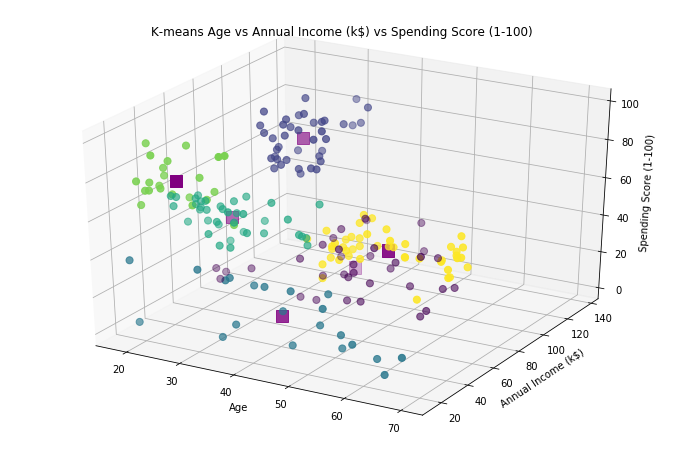

In [13]:
centers = k_means.cluster_centers_
print("cluster centers : ", centers)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection ="3d") 

ax.scatter3D(cstdf['Age'],
             cstdf['Annual Income (k$)'],
             cstdf['Spending Score (1-100)'],
             c=k_means.labels_, s=50)

ax.scatter3D(centers[:,1],centers[:,2], centers[:,3], color='purple', marker='s', s=150) 
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('K-means Age vs Annual Income (k$) vs Spending Score (1-100)')
plt.show()

### Counts for our different clusters

In [14]:
cstdf['cluster'].value_counts()

5    45
1    39
3    38
0    35
4    22
2    21
Name: cluster, dtype: int64

### Verifying and validating the model is correct. To do this get the values of the different clusters. Apply the model and verify.

In [15]:
print(cstdf.loc[cstdf['cluster']==0].head())
print(cstdf.loc[cstdf['cluster']==1].head())
print(cstdf.loc[cstdf['cluster']==2].head())
print(cstdf.loc[cstdf['cluster']==3].head())
print(cstdf.loc[cstdf['cluster']==4].head())
print(cstdf.loc[cstdf['cluster']==5].head())

            Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
CustomerID                                                                  
127              0   43                  71                      35        0
129              0   59                  71                      11        0
131              0   47                  71                       9        0
135              0   20                  73                       5        0
137              1   44                  73                       7        0
            Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
CustomerID                                                                  
124              0   39                  69                      91        1
126              1   31                  70                      77        1
128              0   40                  71                      95        1
130              0   38                  71                      75        1

## <font color="purple"> How to predict cluster for new records. Supply the incoming records as dataframe directly or as an ndarray. Apply the predict function. Example below on the existing data </font>

In [16]:
print(k_means.predict(pd.DataFrame([[0,64,19,3]])))
print(k_means.predict(pd.DataFrame([[1,20,16,6]])))
print(k_means.predict(pd.DataFrame([[0,48,39,36]])))
print(k_means.predict(pd.DataFrame([[1,49,42,52]])))
print(k_means.predict(pd.DataFrame([[0,47,71,9]])))
print(k_means.predict(pd.DataFrame([[1,44,73,7]])))
print(k_means.predict(pd.DataFrame([[0,38,71,75]])))
print(k_means.predict(pd.DataFrame([[1,31,70,77]])))
print(k_means.predict(pd.DataFrame([[0,21,15,81]])))
print(k_means.predict(pd.DataFrame([[1,23,18,94]])))
print(k_means.predict(pd.DataFrame([[0,33,42,60]])))
print(k_means.predict(pd.DataFrame([[1,29,40,42]])))

[2]
[2]
[5]
[5]
[0]
[0]
[1]
[1]
[4]
[4]
[3]
[3]


# Approach for classification using Random Forest

<b> Convert the categorical variable first to a numeric. here only 2 possibilities

In [17]:
cust_df=cust_df.replace('Male',0)
cust_df=cust_df.replace('Female',1)
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


### Get the features and Labels first using the original dataframe. 
### 1. Features are the input parameters - In our case, gender, age and income
### 2. Labels are the output parameter - Prediction parameter - In our case Spending

In [18]:
features=cust_df[['Gender', 'Age', 'Annual Income (k$)']] #Features
labels=cust_df[['Spending Score (1-100)']] #Labels

### Find distribution on the spending score 

[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


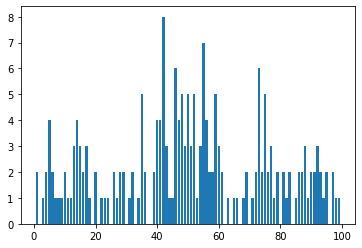

In [19]:
freq = dict(cust_df['Spending Score (1-100)'].value_counts().sort_values(ascending=False))
plt.bar(list(freq.keys()), list(freq.values()))

target = cust_df['Spending Score (1-100)'].unique()
print(target)

### Apply oversampling to simulate low occurrence samples and plot it to check. We are doing this since most of the spending scores appears only once. This makes the data imbalanced. Oversampling will generate a new point close to the original points in space. Use this to fit in the distribution and check.

Feature count :  Gender                672
Age                   672
Annual Income (k$)    672
dtype: int64
Label count :  Spending Score (1-100)    672
dtype: int64


<BarContainer object of 84 artists>

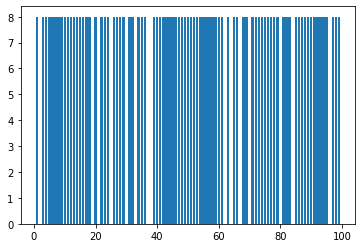

In [20]:
ros = RandomOverSampler()
feature_samples, label_samples = ros.fit_sample(features, labels)
print("Feature count : " , feature_samples.count())
print("Label count : ", label_samples.count())
freq = dict(label_samples['Spending Score (1-100)'].value_counts().sort_values(ascending=False))
plt.bar(list(freq.keys()), list(freq.values()))

<b> split data into training and test data based on 90:10 ratio

In [21]:
x_train, x_test, y_train, y_test = train_test_split(feature_samples, np.ravel(label_samples), test_size=0.1)

<b> Create a Gaussian Classifier with number of estimators as 100

In [22]:
clf=RandomForestClassifier(n_estimators=100)

<b> Train the model using the training sets. Generate predictions on the test set. The data should be array and not dataframe

In [23]:
clf.fit(x_train.values,y_train)

RandomForestClassifier()

## <font color="purple"> How to predict scoring using the classifier for new records. Supply the incoming records as an ndarray. Apply the predict function. Example below on the test data </font>

In [24]:
y_pred=clf.predict(x_test.values)

<b> check the accuracy using actual and predicted values. y_pred is the predicted values and y_test is the sample actual values

In [25]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.9264705882352942


In [26]:
#calculates true positives. Ideal state the diagonals should have non-zero values while the rest should be 0
confusion_matrix(y_test, y_pred) 

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

# For any new incoming data, apply the y_pred=clf.predict(x_test.values) to predict the spending score

In [ ]:
print(clf.predict([[0,19,15]]))
print(clf.predict([[1,20,16]]))